In [1]:
from data.data_manager import ISRLHumanDatasetManager
from data.data_config import ISRLHumanConfig
import matplotlib.pyplot as plt
from mrcnn.model import MaskRCNN

/home/stepan/repositories/intro2cv_final_project/venv2/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/stepan/repositories/intro2cv_final_project/venv2/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/stepan/repositories/intro2cv_final_project/venv2/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = n

In [2]:
# train set
train_set = ISRLHumanDatasetManager()
train_set.load_dataset('../../../../datasets/intro2CV_dataset', is_train=True)
train_set.prepare()
print('Train: %d' % len(train_set.image_ids))

# test/val set
test_set = ISRLHumanDatasetManager()
test_set.load_dataset('../../../../datasets/intro2CV_dataset', is_train=False)
test_set.prepare()
print('Test: %d' % len(test_set.image_ids))

Train: 180
Test: 45


(720, 1280, 3)
(720, 1280, 1)


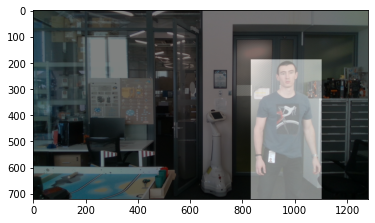

In [3]:
image_id = 0
image = train_set.load_image(image_id)
print(image.shape)
mask, class_ids = train_set.load_mask(image_id)
print(mask.shape)
plt.imshow(image)
plt.imshow(mask[:, :, 0], cmap='gray', alpha=0.5)
plt.show()

In [4]:
for image_id in train_set.image_ids:
	info = train_set.image_info[image_id]
	print(info)

{'id': '66', 'source': 'dataset', 'path': '../../../../datasets/intro2CV_dataset/color/66.png', 'annotation': '../../../../datasets/intro2CV_dataset/annotations_voc_xml/66.xml'}
{'id': '32', 'source': 'dataset', 'path': '../../../../datasets/intro2CV_dataset/color/32.png', 'annotation': '../../../../datasets/intro2CV_dataset/annotations_voc_xml/32.xml'}
{'id': '29', 'source': 'dataset', 'path': '../../../../datasets/intro2CV_dataset/color/29.png', 'annotation': '../../../../datasets/intro2CV_dataset/annotations_voc_xml/29.xml'}
{'id': '88', 'source': 'dataset', 'path': '../../../../datasets/intro2CV_dataset/color/88.png', 'annotation': '../../../../datasets/intro2CV_dataset/annotations_voc_xml/88.xml'}
{'id': '100', 'source': 'dataset', 'path': '../../../../datasets/intro2CV_dataset/color/100.png', 'annotation': '../../../../datasets/intro2CV_dataset/annotations_voc_xml/100.xml'}
{'id': '246', 'source': 'dataset', 'path': '../../../../datasets/intro2CV_dataset/color/246.png', 'annotati

In [5]:
from mrcnn.visualize import display_instances
from mrcnn.utils import extract_bboxes


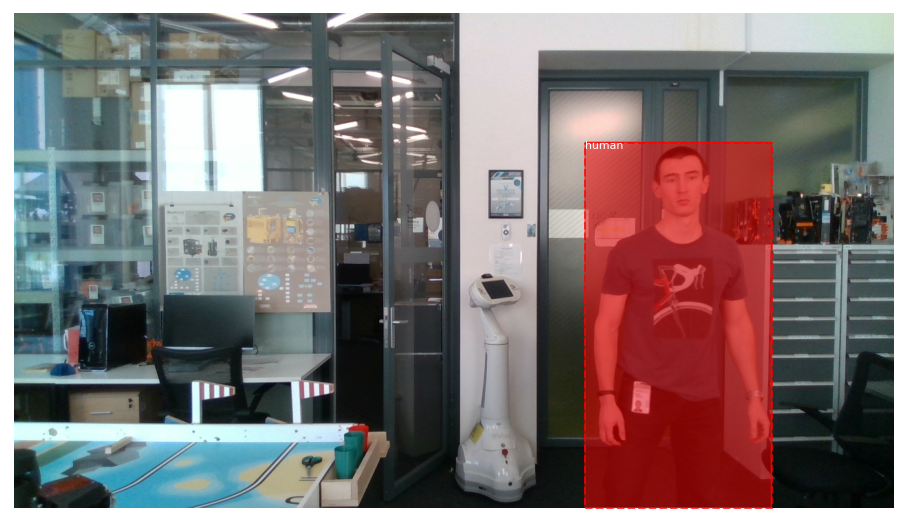

In [6]:
image_id = 0
image = train_set.load_image(image_id)
mask, class_ids = train_set.load_mask(image_id)
bbox = extract_bboxes(mask)
display_instances(image, bbox, mask, class_ids, train_set.class_names)


In [7]:
config = ISRLHumanConfig()
model = MaskRCNN(mode='training', model_dir='./', config=config)







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
box_ind is deprecated, use box_indices instead


In [8]:
model.load_weights('../../models/mask_rcnn_coco.h5', by_name=True, exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", "mrcnn_bbox", "mrcnn_mask"])

In [ ]:
model.train(train_set, test_set, learning_rate=config.LEARNING_RATE, epochs=5, layers='heads')


Starting at epoch 0. LR=0.001

Checkpoint Path: ./human_cfg20201213T2241/mask_rcnn_human_cfg_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4         (TimeD

/home/stepan/repositories/intro2cv_final_project/venv2/lib/python3.6/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/home/stepan/repositories/intro2cv_final_project/venv2/lib/python3.6/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/home/stepan/repositories/intro2cv_final_project/venv2/lib/python3.6/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown s